<a href="https://colab.research.google.com/github/alistechworld/Machine-Learning-Hands-On-Practice-and-Code/blob/main/Day_20_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Binning and Binarization

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train (10).csv to train (10).csv


In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('train (10).csv')

In [7]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [10]:
df = pd.read_csv('train (10).csv', usecols=['Age', 'Fare', 'Survived'])


In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(714, 3)

In [13]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [14]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.head(2)

Age     Fare
328  31.0  20.5250
73   26.0  14.4542

In [17]:
clf = DecisionTreeClassifier()

In [18]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.6433566433566433

In [20]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10, scoring='accuracy'))

np.float64(0.6288536776212832)

In [21]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [22]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [23]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [24]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [25]:
output = pd.DataFrame({
    'age': X_train['Age'],
    'age_trf': X_train_trf[:, 0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:, 1]
})

In [26]:
output['age_labels'] = pd.cut(x=X_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [27]:
output.sample(2)

age  age_trf     fare  fare_trf    age_labels       fare_labels
561  40.0     11.0   7.8958       3.0  (38.0, 42.0]    (7.775, 7.896]
50    7.0      1.0  39.6875      11.0   (6.0, 16.0]  (31.275, 51.479]

In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [29]:
accuracy_score(y_test, y_pred2)

0.6363636363636364

In [30]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

np.float64(0.6274843505477307)

In [31]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()


0.6316705790297339


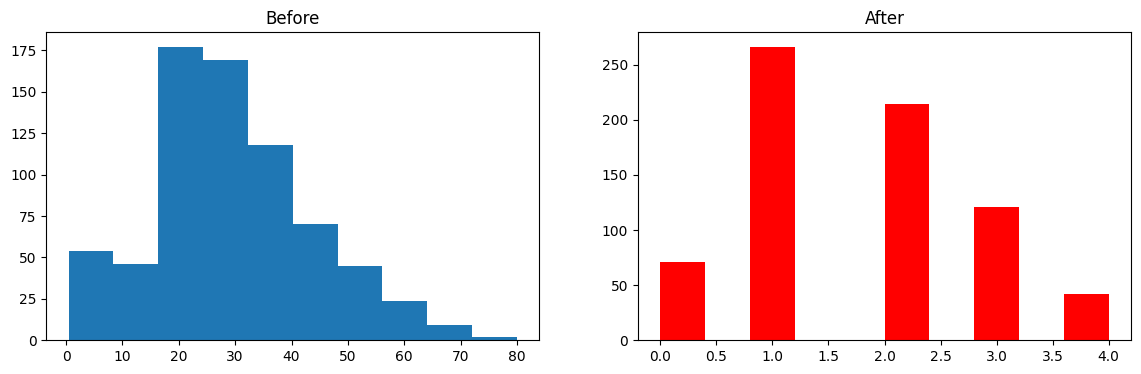

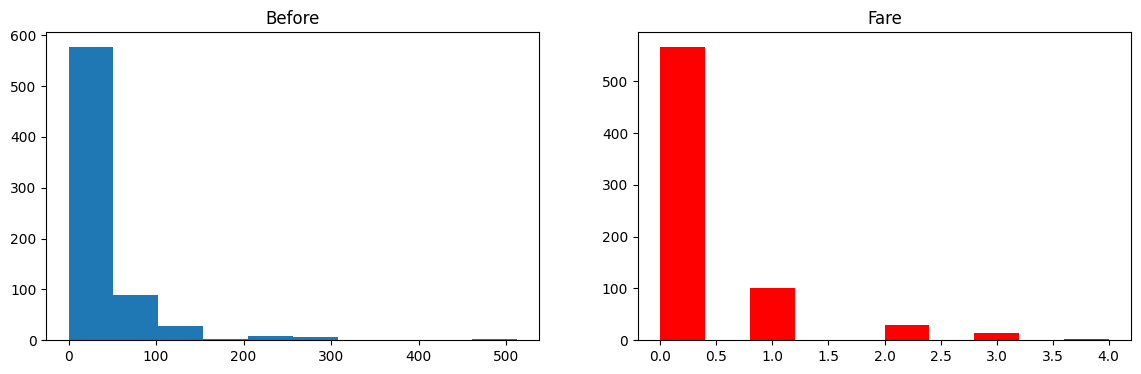

In [32]:
discretize(5, 'kmeans')

In [1]:
# Binarization

In [2]:
import numpy as np
import pandas as pd


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

In [5]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('train (10).csv')[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']]

Saving train (10).csv to train (10).csv


In [35]:
df.dropna(inplace=True)

In [36]:
df['family'] = df['SibSp'] + df['Parch']

In [37]:
df.head(2)

Age     Fare  SibSp  Parch  Survived  family
0  22.0   7.2500      1      0         0       1
1  38.0  71.2833      1      0         1       1

In [38]:
df.dropna(inplace=True)

In [39]:
df.head()

Age     Fare  SibSp  Parch  Survived  family
0  22.0   7.2500      1      0         0       1
1  38.0  71.2833      1      0         1       1
2  26.0   7.9250      0      0         1       0
3  35.0  53.1000      1      0         1       1
4  35.0   8.0500      0      0         0       0

In [40]:
df.head()

Age     Fare  SibSp  Parch  Survived  family
0  22.0   7.2500      1      0         0       1
1  38.0  71.2833      1      0         1       1
2  26.0   7.9250      0      0         1       0
3  35.0  53.1000      1      0         1       1
4  35.0   8.0500      0      0         0       0

In [41]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.head(2)

Age     Fare  SibSp  Parch  family
328  31.0  20.5250      1      1       2
73   26.0  14.4542      1      0       1

In [44]:
# Without binarization
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6363636363636364

In [45]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

np.float64(0.6512715179968701)

In [46]:
# Applying Binarization
from sklearn.preprocessing import Binarizer

In [47]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [48]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [50]:
# pd.DataFrame(X_train_trf, columns=['family', 'Age', 'Fare'])

In [51]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6503496503496503

In [52]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

np.float64(0.6303012519561817)